In [1]:
# Imports
# Gymnasium imports
import gymnasium as gym 
from gymnasium import Env
from gymnasium.spaces import Discrete, Box, Dict, Tuple, MultiBinary, MultiDiscrete 

import networkx as nx
from networkx.drawing.nx_agraph import graphviz_layout

# Import helpers
import numpy as np
import pandas as pd
import random
import os
import json
import matplotlib.pyplot as plt
import seaborn as sns

from collections import deque

# Import stable baselines
from stable_baselines3 import PPO, A2C
from stable_baselines3.common.vec_env import VecFrameStack, DummyVecEnv
from stable_baselines3.common.env_util import make_vec_env
from stable_baselines3.common.evaluation import evaluate_policy
from stable_baselines3.common.env_checker import check_env

from Environment.env_v8 import *
from Functions.visualization_functions import *

In [2]:
# Configuration of the network
with open('./Config/network_config_v1.json') as file:
    network_config = file.read()

In [3]:
EP_LENGTH = 100

stockout_cost = 50
order_cost = 2
item_cost = 0.05
stock_cost = 0.1
item_prize = 20

env = SS_Mngmt_Env(
    network_config=network_config,
    EP_LENGTH=EP_LENGTH,
    render_mode="human",
    model_type="PPO",
    stockout_cost=stockout_cost,
    order_cost=order_cost,
    item_cost=item_cost,
    stock_cost=stock_cost,
    item_prize=item_prize,
    order_quantities=[0, 25, 50],
    demand_mean=8,
    demand_std=2,
    demand_noise=0,
    demand_noise_std=2,
)

check_env(env, warn=True)

In [4]:
log_path = os.path.join('Training', 'Test', 'Logs')
model_path = os.path.join('Training', 'Test', 'Models', 'PPO')

In [5]:
dummy_env = DummyVecEnv([lambda: env])

model = PPO("MultiInputPolicy", 
            dummy_env,
            verbose=0,
            learning_rate=0.0003,
            gamma=0.99,
            clip_range=0.2,
            ent_coef=0.01,
            tensorboard_log=log_path)

In [6]:
model.learn(total_timesteps=200_000)

In [7]:
evaluate_policy(model, env, n_eval_episodes=10, render=True, return_episode_rewards=True)

/Users/jonasrenfer/miniconda3/envs/rl-scm/lib/python3.12/site-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


**************************************************

Episode Information
Episode Length: 1
Stock Level (Previous Timestep): [30.0, 30.0, 30.0]
Stock Level: [30. 30. 30.]
Planned Demand: [0. 0. 0.]
Actual Demand: [0. 0. 0.]
Action: [0, 0, 0]
Deliveries: [0 0 0]
Step Reward: -9.0
Total Reward: -9.0

Backlog:
[False, False, False]

Order Queue:
{   'A': deque([0, 0, 0], maxlen=3),
    'B': deque([0, 0, 0], maxlen=3),
    'C': deque([0, 0, 0], maxlen=3)}


Stockout Counter:  0
Data saved to ./Data/2024-11-30_11_last_environment_data_PPO.csv
**************************************************

Episode Information
Episode Length: 2
Stock Level (Previous Timestep): [30.0, 30.0, 30.0]
Stock Level: [30. 25. 23.]
Planned Demand: [0. 8. 7.]
Actual Demand: [0. 5. 7.]
Action: [0, 0, 0]
Deliveries: [0 0 0]
Step Reward: 232.19999980926514
Total Reward: 223.19999980926514

Backlog:
[False, False, False]

Order Queue:
{   'A': deque([0, 0, 0], maxlen=3),
    'B': deque([0, 0, 0], maxlen=3),
    'C': dequ

([-1252.6000819206238,
  -4510.949968338013,
  -4847.100016593933,
  -4223.600082397461,
  -3598.3999853134155,
  -4900.299987792969,
  521.6500430107117,
  -4311.100093364716,
  -3778.650022506714,
  -4354.300029754639],
 [54, 21, 16, 14, 14, 14, 50, 18, 17, 14])

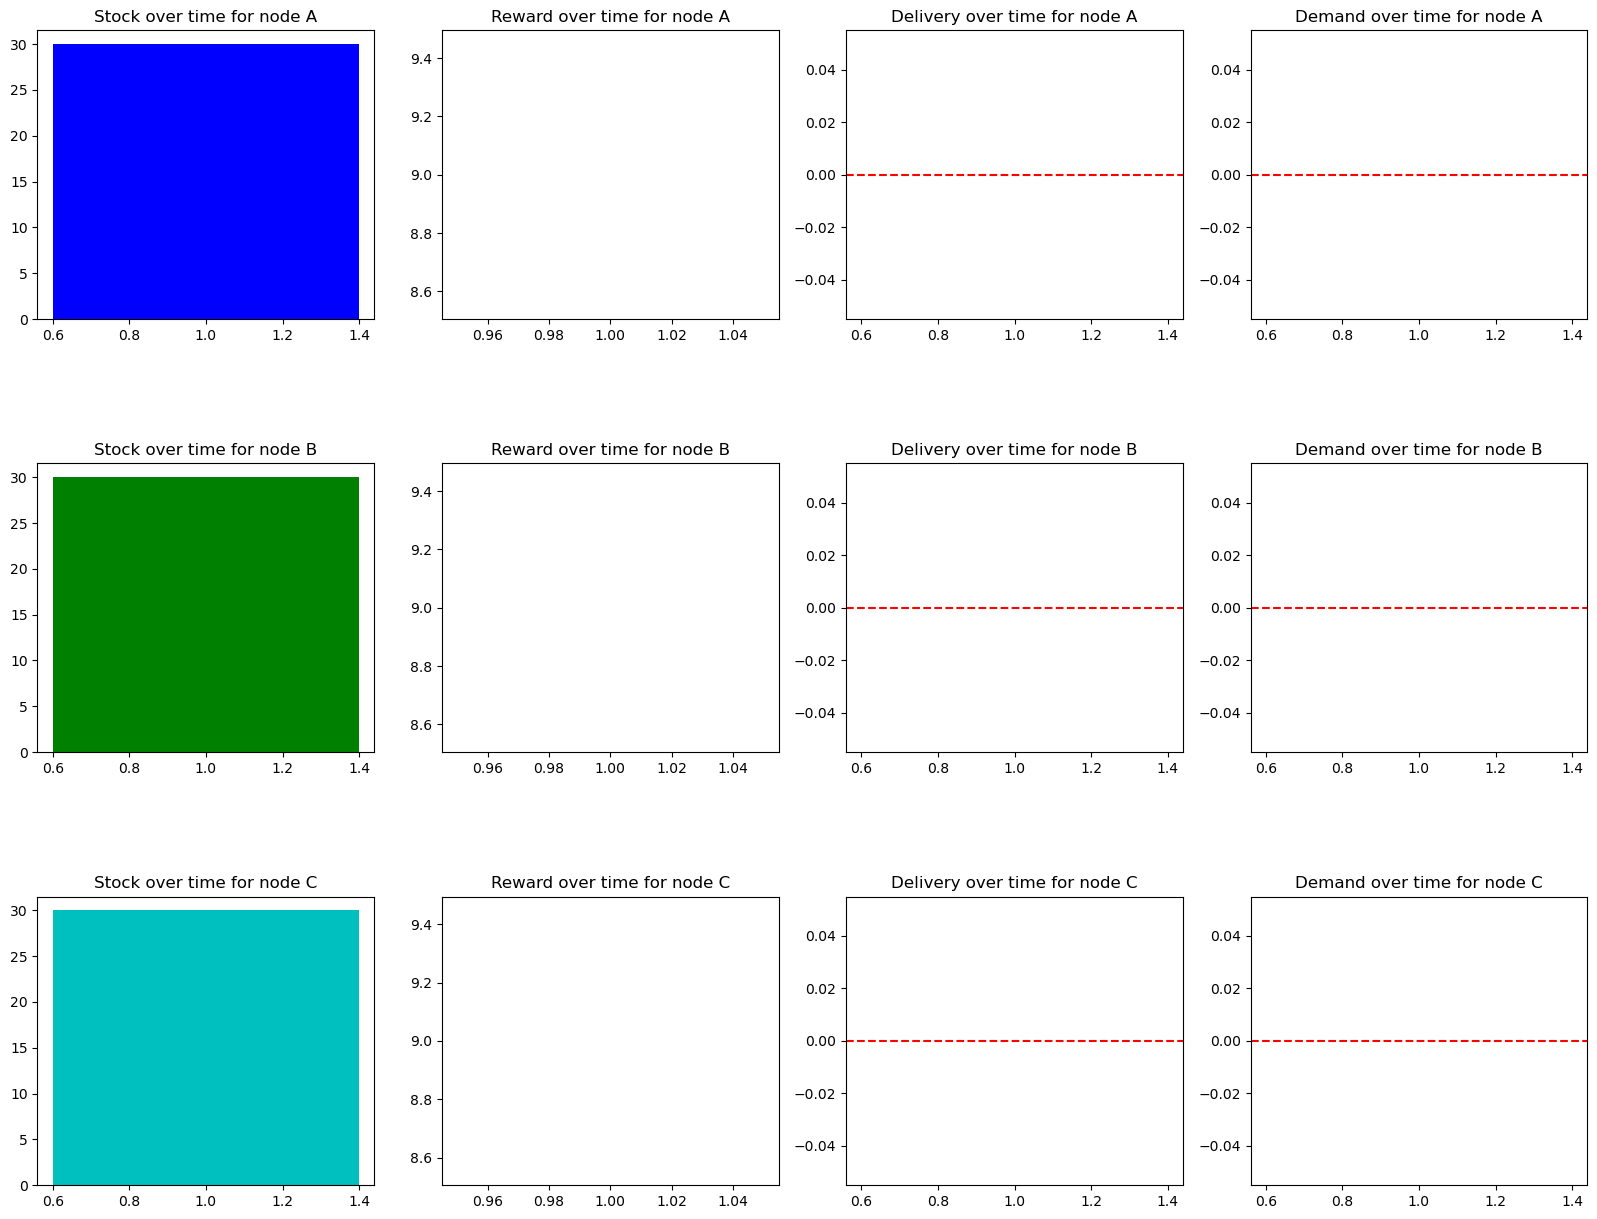

In [9]:
file = './Data/2024-11-30_11_last_environment_data_PPO.csv'
df = pd.read_csv(file)

plot_data(df)